# Titanic Project

## Imports and loading the data

In [184]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import math
import statsmodels.api as sm

df = pd.read_csv("~/Downloads/titanic_data.csv")


## Exploring and cleaning up the data

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

I guess an object is a string? Looking at these, is there anything that needs to be fixed? One thing is that I would like to do correlations with the 'Sex' entry, so it I would like to cast it as boolean/numerical. I'll also rename the dataframe "all" since it contains records for all passengers.


We know that all the records have a sex specified, but let's check that it's always "male" or "female"

In [50]:
print "All records: %d" % df.shape[0]
print "Marked 'male' %d"  % df[df["Sex"] == 'male'].shape[0]
print "Marked 'female' %d "  % df[df["Sex"].str.contains('female')].shape[0]

All records: 891
Marked 'male' 577
Marked 'female' 314 


Now we can sort the records.

In [51]:
def is_female(input):
    if input == "male":
        return False
    if input == "female":
        return True
    else:
        return input

all = df.applymap(is_female)
all.columns.values[4] = 'IsFemale'

In [52]:
all.head()


,PassengerId,Survived,Pclass,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S


Let's add a column to do the same thing for children.  We see from the counts that not all records have ages associated with them, though, so we need to decide what to do when there are no ages.  Let's double-check that, remembering that 714 records have an age associated with them.

In [53]:
print "Where age is known, %d/714 records have age <= 15" % all[all['Age'] <= 15].shape[0]


Where age is known, 83/714 records have age <= 15


So we will assume where an age is not specified that the passenger is an adult.

In [54]:
def is_child(row):
    if row['Age'] > 15.0:
        return False
    if row['Age'] <= 15.0:
        return True
    else:
        return False

all['IsChild'] = all.apply(is_child, axis=1)

In [55]:
all.head()

,PassengerId,Survived,Pclass,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S,False


Now, let's look at the correlations for the "all" dataframe.


In [56]:
all.corr()


,PassengerId,Survived,Pclass,IsFemale,Age,SibSp,Parch,Fare,IsChild
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.017941
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.136107
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.121920
IsFemale,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.111141
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.582875
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.352437
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.351481
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.003753
IsChild,-0.017941,0.136107,0.121920,0.111141,-0.582875,0.352437,0.351481,0.003753,1.000000


In [57]:
all.groupby('Pclass').describe()

Age        Fare       Parch  PassengerId       SibSp  \
Pclass                                                                      
1      count  186.000000  216.000000  216.000000   216.000000  216.000000   
       mean    38.233441   84.154687    0.356481   461.597222    0.416667   
       std     14.802856   78.380373    0.693997   246.737616    0.611898   
       min      0.920000    0.000000    0.000000     2.000000    0.000000   
       25%     27.000000   30.923950    0.000000   270.750000    0.000000   
       50%     37.000000   60.287500    0.000000   472.000000    0.000000   
       75%     49.000000   93.500000    0.000000   670.500000    1.000000   
       max     80.000000  512.329200    4.000000   890.000000    3.000000   
2      count  173.000000  184.000000  184.000000   184.000000  184.000000   
       mean    29.877630   20.662183    0.380435   445.956522    0.402174   
       std     14.001077   13.417399    0.690963   250.852161    0.601633   
       min      0.670000    0.000000    0.000000    10.000000    0.000000   
       25%     23.000000   13.000000    0.000000   234.500000    0.000000   
       50%     29.000000   14.250000    0.000000   435.500000    0.000000   
       75%     36.000000   26.000000    1.000000   668.000000    1.000000   
       max     70.000000   73.500000    3.000000   887.000000    3.000000   
3      count  355.000000  491.000000  491.000000   491.000000  491.000000   
       mean    25.140620   13.675550    0.393075   439.154786    0.615071   
       std     12.495398   11.778142    0.888861   264.441453    1.374883   
       min      0.420000    0.000000    0.000000     1.000000    0.000000   
       25%     18.000000    7.750000    0.000000   200.000000    0.000000   
       50%     24.000000    8.050000    0.000000   432.000000    0.000000   
       75%     32.000000   15.500000    0.000000   666.500000    1.000000   
       max     74.000000   69.550000    6.000000   891.000000    8.000000   

                Survived  
Pclass                    
1      count  216.000000  
       mean     0.629630  
       std      0.484026  
       min      0.000000  
       25%      0.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
2      count  184.000000  
       mean     0.472826  
       std      0.500623  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      1.000000  
       max      1.000000  
3      count  491.000000  
       mean     0.242363  
       std      0.428949  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

In [58]:
all.groupby('Pclass').corr()

Age      Fare   IsChild  IsFemale     Parch  \
Pclass                                                                 
1      Age          1.000000 -0.218611 -0.376123 -0.225052 -0.243613   
       Fare        -0.218611  1.000000  0.119378  0.246625  0.380963   
       IsChild     -0.376123  0.119378  1.000000  0.022098  0.360539   
       IsFemale    -0.225052  0.246625  0.022098  1.000000  0.127999   
       Parch       -0.243613  0.380963  0.360539  0.127999  1.000000   
       PassengerId -0.003969 -0.026348  0.023966  0.027155 -0.026157   
       SibSp       -0.121015  0.259492  0.069221  0.196302  0.261954   
       Survived    -0.267964  0.190966  0.071302  0.615212  0.062565   
2      Age          1.000000 -0.197038 -0.637407 -0.071507 -0.300814   
       Fare        -0.197038  1.000000  0.194302  0.081997  0.373920   
       IsChild     -0.637407  0.194302  1.000000  0.078065  0.434699   
       IsFemale    -0.071507  0.081997  0.078065  1.000000  0.273700   
       Parch       -0.300814  0.373920  0.434699  0.273700  1.000000   
       PassengerId  0.039077  0.021281 -0.024642 -0.009561  0.077052   
       SibSp       -0.210424  0.546093  0.219045  0.118377  0.326626   
       Survived    -0.273507  0.098628  0.358312  0.753121  0.361793   
3      Age          1.000000 -0.260315 -0.648927 -0.172537 -0.138434   
       Fare        -0.260315  1.000000  0.296890  0.133768  0.585265   
       IsChild     -0.648927  0.296890  1.000000  0.180045  0.335435   
       IsFemale    -0.172537  0.133768  0.180045  1.000000  0.294208   
       Parch       -0.138434  0.585265  0.335435  0.294208  1.000000   
       PassengerId  0.034886  0.002053 -0.018034 -0.096141 -0.014438   
       SibSp       -0.435763  0.766003  0.410390  0.131684  0.464733   
       Survived    -0.202102  0.000930  0.161144  0.387313  0.017257   

                    PassengerId     SibSp  Survived  
Pclass                                               
1      Age            -0.003969 -0.121015 -0.267964  
       Fare           -0.026348  0.259492  0.190966  
       IsChild         0.023966  0.069221  0.071302  
       IsFemale        0.027155  0.196302  0.615212  
       Parch          -0.026157  0.261954  0.062565  
       PassengerId     1.000000 -0.055167  0.159824  
       SibSp          -0.055167  1.000000  0.162276  
       Survived        0.159824  0.162276  1.000000  
2      Age             0.039077 -0.210424 -0.273507  
       Fare            0.021281  0.546093  0.098628  
       IsChild        -0.024642  0.219045  0.358312  
       IsFemale       -0.009561  0.118377  0.753121  
       Parch           0.077052  0.326626  0.361793  
       PassengerId     1.000000  0.079737 -0.026030  
       SibSp           0.079737  1.000000  0.145340  
       Survived       -0.026030  0.145340  1.000000  
3      Age             0.034886 -0.435763 -0.202102  
       Fare            0.002053  0.766003  0.000930  
       IsChild        -0.018034  0.410390  0.161144  
       IsFemale       -0.096141  0.131684  0.387313  
       Parch          -0.014438  0.464733  0.017257  
       PassengerId     1.000000 -0.080127 -0.096550  
       SibSp          -0.080127  1.000000 -0.073339  
       Survived       -0.096550 -0.073339  1.000000

So, we see that there is strong correlation of survival with IsFemale and negative correlation with high Pclass. There's a somewhat lower correlation for IsChild.  

Let's look at a description to check for outliers.

In [59]:
all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


These mins and maxes look reasonable.  We could do something like verifying that passengers in higher classes of service paid a higher fare, but that seems kind of far afield from the interesting questions. So let's get on to those! But first, a few histograms as a sanity check.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d675590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11de15310>]], dtype=object)

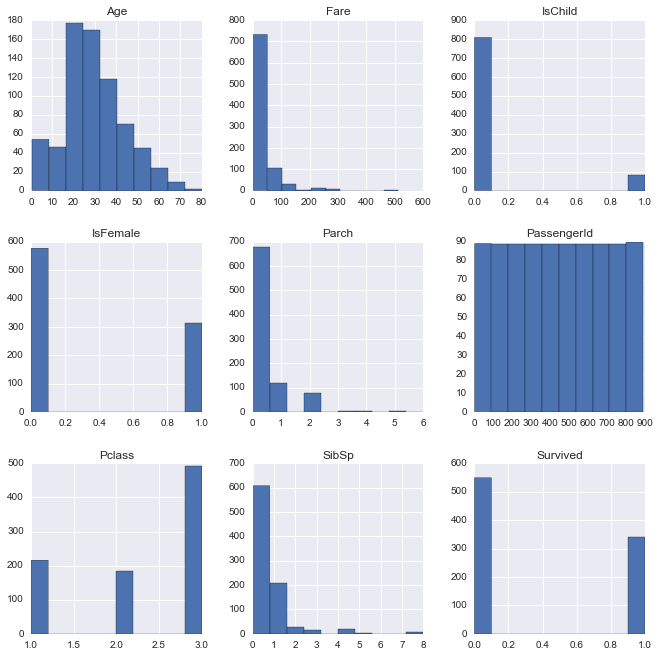

In [60]:
all.hist(figsize=(11,11))

## Question: Did large families of children have a worse survival rate?

In [133]:
children = all[all["Age"] < 15]


In [134]:
children.corr()

,PassengerId,Survived,Pclass,IsFemale,Age,SibSp,Parch,Fare,IsChild
PassengerId,1.000000,0.090493,-0.031728,-0.097111,-0.034271,-0.086433,0.020985,-0.017807,NaN
Survived,0.090493,1.000000,-0.443057,0.077850,-0.233099,-0.663832,-0.136593,-0.053537,NaN
Pclass,-0.031728,-0.443057,1.000000,0.021315,0.091865,0.387525,-0.186995,-0.681269,NaN
IsFemale,-0.097111,0.077850,0.021315,1.000000,0.138358,-0.265982,-0.059143,-0.124083,NaN
Age,-0.034271,-0.233099,0.091865,0.138358,1.000000,0.045571,-0.198183,0.013355,NaN
SibSp,-0.086433,-0.663832,0.387525,-0.265982,0.045571,1.000000,0.282540,0.109287,NaN
Parch,0.020985,-0.136593,-0.186995,-0.059143,-0.198183,0.282540,1.000000,0.430846,NaN
Fare,-0.017807,-0.053537,-0.681269,-0.124083,0.013355,0.109287,0.430846,1.000000,NaN
IsChild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
children.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,423.717949,0.576923,2.628205,5.816282,1.820513,1.320513,31.704435
std,282.756189,0.497245,0.605365,4.320822,1.649428,0.654526,27.353590
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.229200
25%,172.250000,0.000000,2.000000,2.000000,0.250000,1.000000,18.750000
50%,428.000000,1.000000,3.000000,4.000000,1.000000,1.000000,27.000000
75%,690.750000,1.000000,3.000000,9.000000,3.750000,2.000000,32.596875
max,870.000000,1.000000,3.000000,14.500000,5.000000,2.000000,151.550000


In [136]:
children.groupby("Pclass").describe()


Age        Fare      Parch  PassengerId      SibSp  \
Pclass                                                                   
1      count   5.000000    5.000000   5.000000     5.000000   5.000000   
       mean    6.384000  124.991660   2.000000   457.800000   0.800000   
       std     5.789411   28.814106   0.000000   205.156526   0.447214   
       min     0.920000   81.858300   2.000000   298.000000   0.000000   
       25%     2.000000  120.000000   2.000000   306.000000   1.000000   
       50%     4.000000  120.000000   2.000000   436.000000   1.000000   
       75%    11.000000  151.550000   2.000000   446.000000   1.000000   
       max    14.000000  151.550000   2.000000   803.000000   1.000000   
2      count  19.000000   19.000000  19.000000    19.000000  19.000000   
       mean    4.543684   28.323905   1.263158   427.789474   0.789474   
       std     3.955098    7.750054   0.561951   282.201579   0.630604   
       min     0.670000   14.500000   0.000000    10.000000   0.000000   
       25%     1.500000   24.500000   1.000000   189.000000   0.000000   
       50%     3.000000   26.250000   1.000000   447.000000   1.000000   
       75%     6.500000   34.875000   2.000000   670.000000   1.000000   
       max    14.000000   41.579200   2.000000   832.000000   2.000000   
3      count  54.000000   54.000000  54.000000    54.000000  54.000000   
       mean    6.211481   24.256174   1.277778   419.129630   2.277778   
       std     4.302470   11.061837   0.684510   292.907871   1.763537   
       min     0.420000    7.229200   0.000000     8.000000   0.000000   
       25%     2.000000   15.369775   1.000000   165.250000   1.000000   
       50%     5.000000   21.550000   1.000000   403.500000   2.500000   
       75%     9.000000   31.275000   2.000000   690.750000   4.000000   
       max    14.500000   46.900000   2.000000   870.000000   5.000000   

               Survived  
Pclass                   
1      count   5.000000  
       mean    0.800000  
       std     0.447214  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
2      count  19.000000  
       mean    1.000000  
       std     0.000000  
       min     1.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
3      count  54.000000  
       mean    0.407407  
       std     0.495966  
       min     0.000000  
       25%     0.000000  
       50%     0.000000  
       75%     1.000000  
       max     1.000000

OK, this is the saddest thing, I think.  Children had a very good survival rate in the first two classes of service. Of the six in first class, only one died, the unfortunate Allison toddler--whose mother refused to board a lifeboat.  Of the 19 in second class, all survived.  But most of the children on the Titanic (54 in this sample) were in third class cabins.  Only 40% (roughly) of these children survived. 



In [140]:
third_class_children = children[children['Pclass']==3]

In [172]:
third_class_children.corr()

,PassengerId,Survived,Pclass,IsFemale,Age,SibSp,Parch,Fare,IsChild
PassengerId,1.000000,0.091844,NaN,-0.069624,-0.018618,-0.088173,0.051010,-0.050916,NaN
Survived,0.091844,1.000000,NaN,0.150756,-0.262898,-0.606410,-0.228482,-0.600361,NaN
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsFemale,-0.069624,0.150756,NaN,1.000000,0.002520,-0.349780,-0.081923,-0.384981,NaN
Age,-0.018618,-0.262898,NaN,0.002520,1.000000,0.008673,-0.215724,0.064856,NaN
SibSp,-0.088173,-0.606410,NaN,-0.349780,0.008673,1.000000,0.466296,0.880086,NaN
Parch,0.051010,-0.228482,NaN,-0.081923,-0.215724,0.466296,1.000000,0.598045,NaN
Fare,-0.050916,-0.600361,NaN,-0.384981,0.064856,0.880086,0.598045,1.000000,NaN
IsChild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the correlations, we see several that look significant.  Some of these are expected (the inverse correlation with age, positive correlation with IsFemale), others less so.

The SibSp correlation seems like potentially the most interesting to investigate.  Were large families of children at a disadvantage in surviving the disaster?


In [173]:
third_class_children.groupby('SibSp').describe()

Age       Fare      Parch  PassengerId  Pclass   Survived
SibSp                                                                       
0     count  13.000000  13.000000  13.000000    13.000000    13.0  13.000000
      mean    6.263077  14.303538   1.000000   491.769231     3.0   0.692308
      std     4.647909   5.544321   0.816497   282.125609     0.0   0.480384
      min     0.420000   7.229200   0.000000    15.000000     3.0   0.000000
      25%     2.000000  10.462500   0.000000   206.000000     3.0   0.000000
      50%     5.000000  12.475000   1.000000   480.000000     3.0   1.000000
      75%    10.000000  18.787500   2.000000   752.000000     3.0   1.000000
      max    14.000000  24.150000   2.000000   804.000000     3.0   1.000000
1     count  10.000000  10.000000  10.000000    10.000000    10.0  10.000000
      mean    7.150000  14.352500   0.800000   381.300000     3.0   0.800000
      std     5.207100   3.160674   0.632456   345.624089     0.0   0.421637
      min     1.000000  11.133300   0.000000    11.000000     3.0   0.000000
      25%     3.250000  11.241700   0.250000   115.500000     3.0   1.000000
      50%     6.500000  14.850000   1.000000   261.000000     3.0   1.000000
      75%    11.250000  15.900000   1.000000   714.250000     3.0   1.000000
      max    14.500000  20.575000   2.000000   870.000000     3.0   1.000000
2     count   4.000000   4.000000   4.000000     4.000000     4.0   4.000000
      mean    3.875000  23.037475   1.250000   428.000000     3.0   0.750000
      std     3.960745   7.558350   0.500000   206.312061     0.0   0.500000
      min     0.750000  19.258300   1.000000   148.000000     3.0   0.000000
      25%     0.750000  19.258300   1.000000   373.750000     3.0   0.750000
      50%     2.875000  19.258300   1.000000   459.500000     3.0   1.000000
      75%     6.000000  23.037475   1.250000   513.750000     3.0   1.000000
      max     9.000000  34.375000   2.000000   645.000000     3.0   1.000000
3     count   7.000000   7.000000   7.000000     7.000000     7.0   7.000000
      mean    5.428571  24.975000   1.571429   367.142857     3.0   0.000000
      std     3.457222   3.648116   0.534522   339.344185     0.0   0.000000
      min     2.000000  21.075000   1.000000     8.000000     3.0   0.000000
      25%     2.500000  21.075000   1.000000    44.500000     3.0   0.000000
      50%     4.000000  27.900000   2.000000   375.000000     3.0   0.000000
      75%     8.500000  27.900000   2.000000   639.000000     3.0   0.000000
      max    10.000000  27.900000   2.000000   820.000000     3.0   0.000000
4     count  16.000000  16.000000  16.000000    16.000000    16.0  16.000000
      mean    5.875000  32.861719   1.500000   408.312500     3.0   0.125000
      std     3.685557   4.173933   0.516398   304.441723     0.0   0.341565
      min     1.000000  29.125000   1.000000    17.000000     3.0   0.000000
      25%     2.750000  30.737500   1.000000   170.250000     3.0   0.000000
      50%     5.500000  31.275000   1.500000   270.500000     3.0   0.000000
      75%     8.250000  33.462500   2.000000   712.250000     3.0   0.000000
      max    14.000000  39.687500   2.000000   851.000000     3.0   1.000000
5     count   4.000000   4.000000   4.000000     4.000000     4.0   4.000000
      mean    8.750000  46.900000   2.000000   403.000000     3.0   0.000000
      std     5.560276   0.000000   0.000000   260.096136     0.0   0.000000
      min     1.000000  46.900000   2.000000    60.000000     3.0   0.000000
      25%     7.000000  46.900000   2.000000   305.250000     3.0   0.000000
      50%    10.000000  46.900000   2.000000   434.000000     3.0   0.000000
      75%    11.750000  46.900000   2.000000   531.750000     3.0   0.000000
      max    14.000000  46.900000   2.000000   684.000000     3.0   0.000000

In [174]:
survival_by_sibsp = third_class_children.groupby('SibSp').mean()['Survived']
survival_by_sibsp

SibSp
0    0.692308
1    0.800000
2    0.750000
3    0.000000
4    0.125000
5    0.000000
Name: Survived, dtype: float64

Having siblings was negatively correlated with survival, and married women travelling with children were also less likely to survive.  In the struggle to get on the life-boats in third class, having a family of small children was negatively correlated with survival.

Let's try some visualizations.  Let's look at the distribution by SibSp, and then the survival rates.

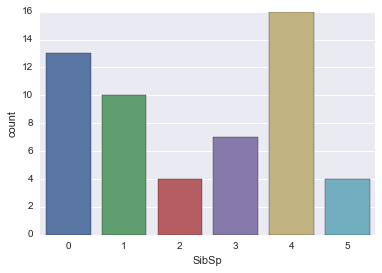

In [178]:
sns.countplot(x='SibSp',  data=third_class_children)

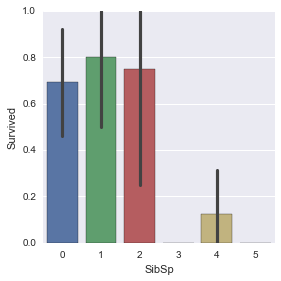

In [175]:
sns.factorplot(x='SibSp', y="Survived",  data=third_class_children, kind='bar')


We can try a simple linear regression:

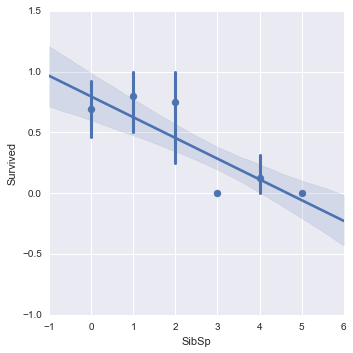

In [179]:
sns.lmplot("SibSp", "Survived", third_class_children, x_estimator=np.mean, fit_reg=True)

But because the output is binary, perhaps a logistic regression is more appropriate:


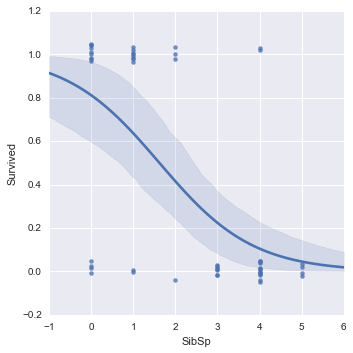

In [181]:
sns.lmplot(x="SibSp", y="Survived", data=third_class_children, logistic=True, y_jitter=.05, fit_reg=True)     


In [185]:
logit = sm.Logit(third_class_children['Survived'], third_class_children['SibSp'])
result = logit.fit()
print result.summary()


Optimization terminated successfully.
         Current function value: 0.549406
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   54
Model:                          Logit   Df Residuals:                       53
Method:                           MLE   Df Model:                            0
Date:                Sun, 10 Jul 2016   Pseudo R-squ.:                  0.1871
Time:                        15:31:58   Log-Likelihood:                -29.668
converged:                       True   LL-Null:                       -36.499
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
SibSp         -0.4414      0.132     -3.333      0.001        -0.701    -0.182


The black magic of sm.Logit tells us that there is less than .1% chance that this result would occur if survival were unrelated to family size.

Now, looking back at other somewhat puzzling things that had negative correlation with survival, how do they relate to family size?  Fare, for instance.

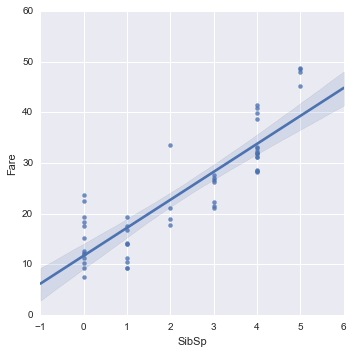

In [199]:
sns.lmplot("SibSp", "Fare", third_class_children, y_jitter=2)

It's harder to tell from the scatter because points are falling on top of each other, but the best fit line shows a strong correlation.  Examining the data for families with SibSp of 4 and 5, we can see the reason for both the correlation and the points falling on top of each other.  The "Fare" entry lists the fare _for the whole family_, so the number is higher if a family is larger.  As an example, have a look at the single SibSp == 5 family:

In [192]:
third_class_children[third_class_children['SibSp'] ==5]

,PassengerId,Survived,Pclass,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsChild
59,60,0,3,"Goodwin, Master. William Frederick",False,11.0,5,2,CA 2144,46.9,NaN,S,True
386,387,0,3,"Goodwin, Master. Sidney Leonard",False,1.0,5,2,CA 2144,46.9,NaN,S,True
480,481,0,3,"Goodwin, Master. Harold Victor",False,9.0,5,2,CA 2144,46.9,NaN,S,True
683,684,0,3,"Goodwin, Mr. Charles Edward",False,14.0,5,2,CA 2144,46.9,NaN,S,True


The other family groups show the same thing.  So, "Fare" is just a proxy for family size.  Now, lets look at "Parch".  It seems very counter-intuitive that having more parents on board would correlate negatively with survival, unless....


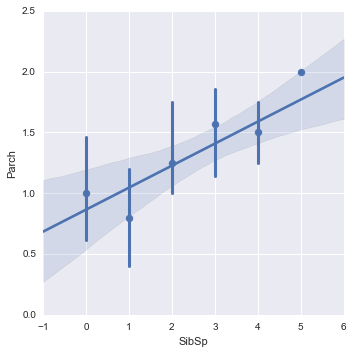

In [193]:
sns.lmplot("SibSp", "Parch", third_class_children, x_estimator=np.mean)

OK, so that explains that.  Not much more to say...